c:\Users\Lardex\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Lardex\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


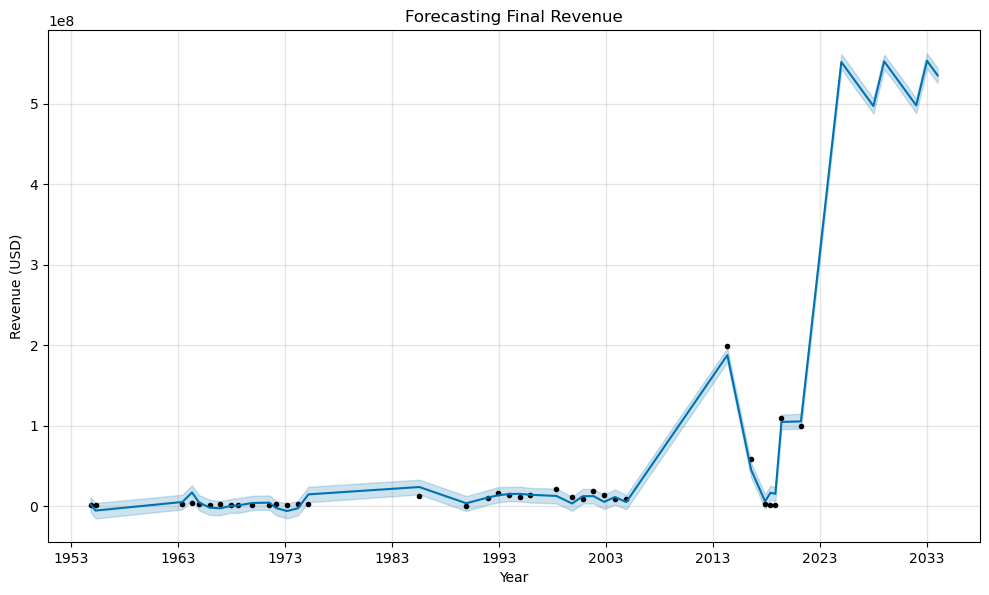

In [6]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the model from the pickle file
with open('prophet_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load the prophet_data from the pickle file
with open('prophet_data.pkl', 'rb') as f:
    loaded_prophet_data = pickle.load(f)

# Example custom input data for prediction
custom_data = pd.DataFrame({
    'ds': ['2025-01-01', '2026-01-01', '2027-01-01', '2028-01-01', '2029-01-01', '2030-01-01', '2031-01-01', '2032-01-01', '2033-01-01', '2034-01-01']
})

# Convert 'ds' to datetime format
custom_data['ds'] = pd.to_datetime(custom_data['ds'])

# Combine the original prophet_data with the custom_data for prediction
combined_data = pd.concat([loaded_prophet_data, custom_data])

# Make predictions
forecast = loaded_model.predict(combined_data)

# Plot the forecast
loaded_model.plot(forecast)
plt.title('Forecasting Final Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (USD)')
plt.show()